# EDA

In [1]:
import pandas as pd

# Load the data

In [2]:
train_df_path = "train.json"

val_df_path = "val.json"

In [3]:
train_df = pd.read_json(train_df_path)
train_df.head()

rgb  \
0    /datasets2/users/pmazurek/nirscene1/forest/000...   
1    /datasets2/users/pmazurek/nirscene1/forest/000...   
10   /datasets2/users/pmazurek/nirscene1/forest/001...   
101  /datasets2/users/pmazurek/nirscene1/indoor/004...   
102  /datasets2/users/pmazurek/nirscene1/indoor/005...   

                                              infrared   label  
0    /datasets2/users/pmazurek/nirscene1/forest/000...  forest  
1    /datasets2/users/pmazurek/nirscene1/forest/000...  forest  
10   /datasets2/users/pmazurek/nirscene1/forest/001...  forest  
101  /datasets2/users/pmazurek/nirscene1/indoor/004...  indoor  
102  /datasets2/users/pmazurek/nirscene1/indoor/005...  indoor

In [4]:
val_df = pd.read_json(val_df_path)
val_df.head()

rgb  \
100  /datasets2/users/pmazurek/nirscene1/indoor/004...   
103  /datasets2/users/pmazurek/nirscene1/indoor/005...   
105  /datasets2/users/pmazurek/nirscene1/indoor/005...   
116  /datasets2/users/pmazurek/nirscene1/street/001...   
120  /datasets2/users/pmazurek/nirscene1/street/001...   

                                              infrared   label  
100  /datasets2/users/pmazurek/nirscene1/indoor/004...  indoor  
103  /datasets2/users/pmazurek/nirscene1/indoor/005...  indoor  
105  /datasets2/users/pmazurek/nirscene1/indoor/005...  indoor  
116  /datasets2/users/pmazurek/nirscene1/street/001...  street  
120  /datasets2/users/pmazurek/nirscene1/street/001...  street

# Basic stats

In [5]:
f"{len(train_df)} examples in train set and {len(val_df)} example in val set"

'381 examples in train set and 96 example in val set'

In [6]:
train_df.label.value_counts()

urban          46
indoor         45
mountain       44
forest         42
country        41
water          41
oldbuilding    41
field          41
street         40
Name: label, dtype: int64

In [7]:
train_df.label.value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

# Load dataset

In [8]:
from experiments.epfl_utils import train_set

# Visualisations

In [9]:
import matplotlib.pyplot as plt


def show_images(title, **images):
    n_row = 1
    n_col = len(images)
    
    fig, axs = plt.subplots(n_row, n_col, figsize=(20, 5))
    
    fig.suptitle(title)
    for img, name, ax in zip(images.values(), images.keys(), axs):
        ax.title.set_text(name)
        ax.imshow(img)
    plt.show()

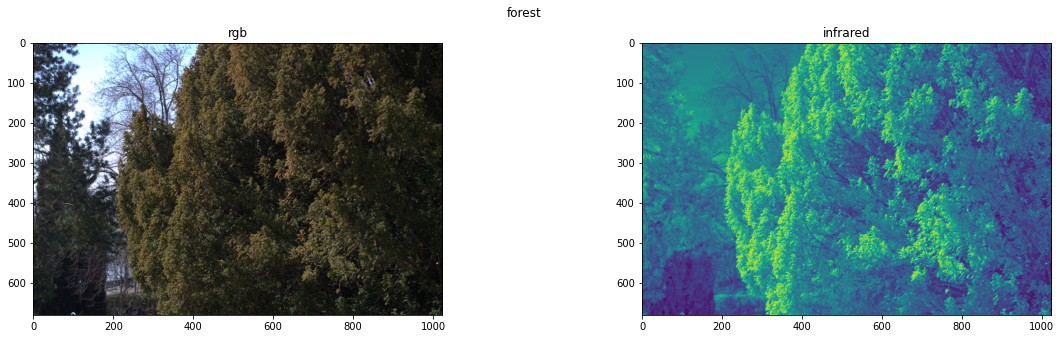

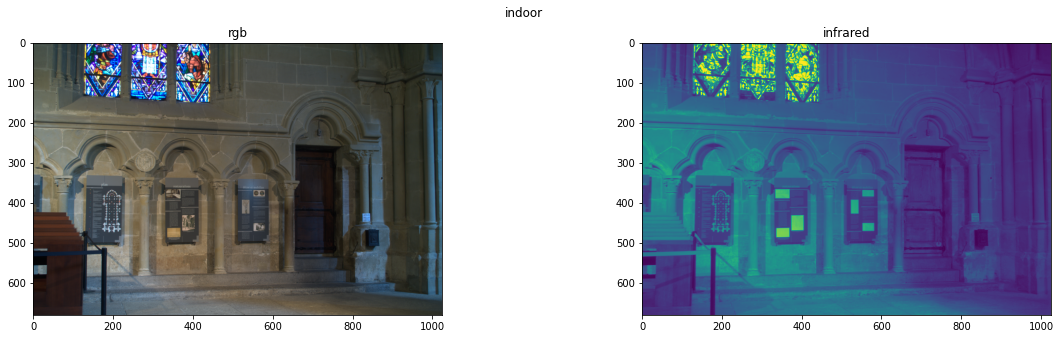

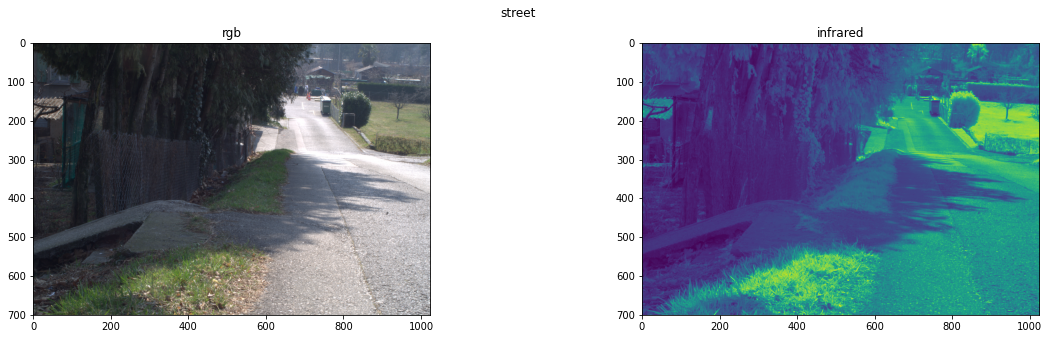

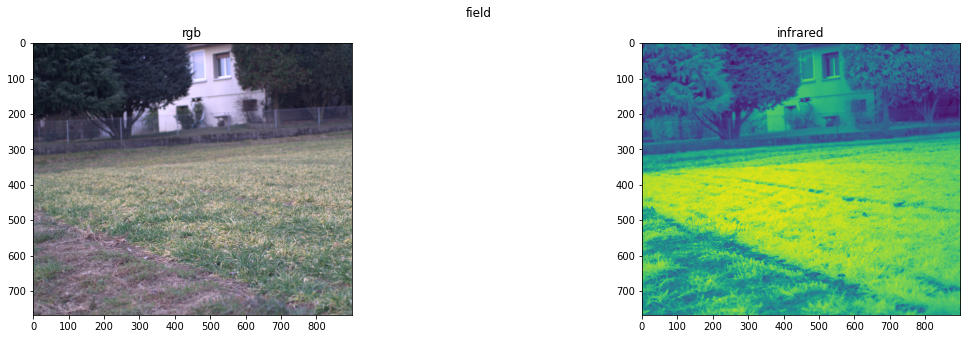

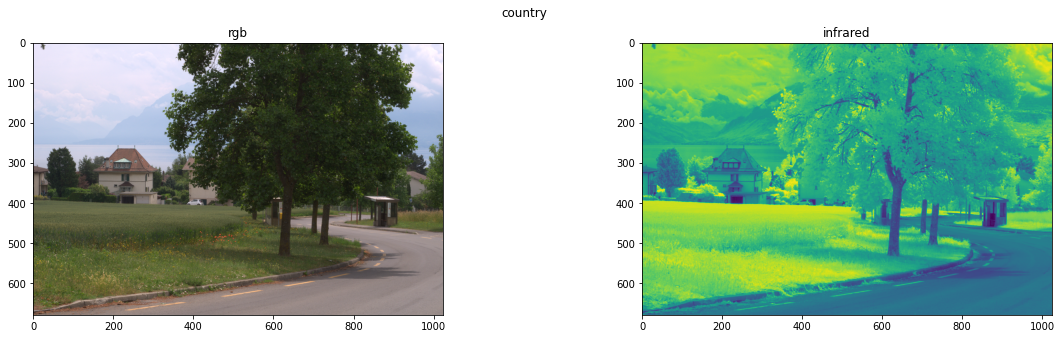

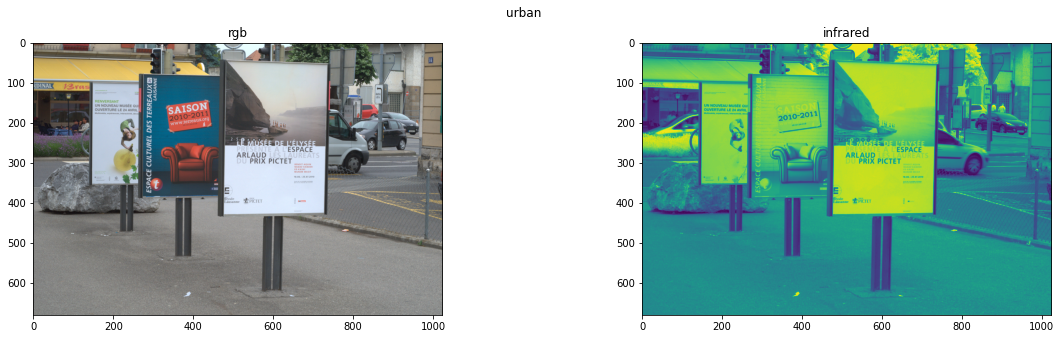

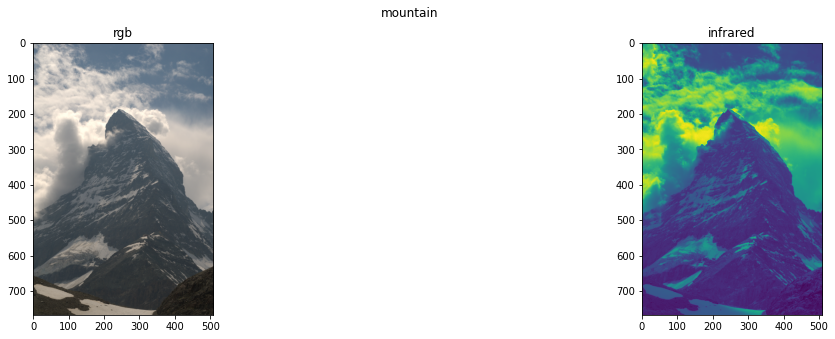

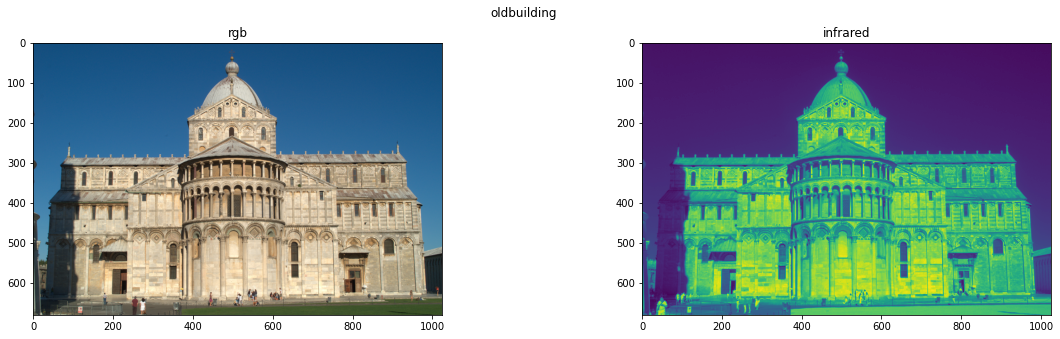

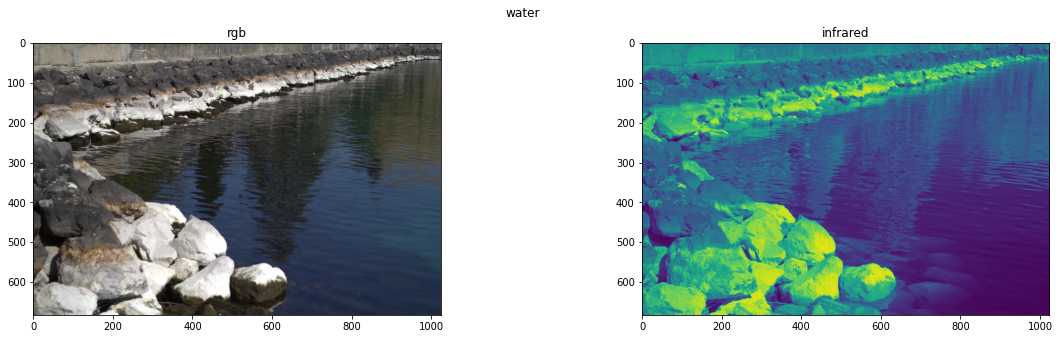

In [11]:
for label in train_df.label.unique():
    for example in train_set:
        if example["original_label"] == label:
            show_images(example["original_label"], rgb=example["original_rgb_img"], infrared=example["original_infrared_img"])
            break
        